In [1]:
### Carregando bibliotecas necessárias (se não possuir alguma é só ir no terminal e escrever: pip install `nome_da_biblioteca`)

# Manipulação de dados 
import pandas as pd
import numpy as np
# Visualização 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
# Tempos computacionais
import timeit


In [150]:

### Importando os bancos de dados

dados1 = pd.read_csv('Banco 2020-04-08.csv') #Certifique-se que o csv está na sua pasta (ou coloque o caminho inteiro do arquivo)
dados2 = pd.read_csv('C:/Users/spcs/Downloads/UNB/ESTAT/61imoveis/Banco 2020-04-10.csv')



In [152]:
### Exploratória básica dos dados

## Nº de linhas e colunas
shape = dados1.shape
print(shape)
# Será que os 2 bancos tem o mesmo nº de colunas?
dados1.shape[1]==dados2.shape[1] # lembre que o index começa em 0, diferente do R que começa em 1 



(32510, 78)


True

In [153]:
# Ai Laura criei um objeto que não quero mais, como deletar??
del(shape) #Assim 


In [154]:
## Visualizar x primeiras linhas do dataframe
x = 5
dados1.head(x)


,data,link,ativo,oferta,tipo,subtipo,endereco,categoria,atualizacao,codigo,...,Gás.Canalizado,Lazer.no.Pilotis,Sala.de.Jogos,SPA,Home.Theater,Mobiliado,horario,latitude,longitude,cep
0,2020-04-08,https://www.dfimoveis.com.br//imovel/apartamen...,True,Venda,Apartamento,Padrão,SQSW 102 Bloco G - Ed. Porto alegre,NaN,2020-04-06,201716,...,False,False,False,False,False,False,2020-04-08 21:08:58,-15.801374,-47.920790,70670207
1,2020-04-08,https://www.dfimoveis.com.br//imovel/apartamen...,True,Venda,Apartamento,Padrão,Rua 28 - Grand Home,NaN,2020-02-28,188917,...,True,True,True,False,True,False,2020-04-08 21:09:05,-15.837709,-48.031243,71917720
2,2020-04-08,https://www.dfimoveis.com.br//imovel/apartamen...,True,Venda,Apartamento,Padrão,Av das Araucárias - Península Lazer e Urbanismo,NaN,2020-02-23,175958,...,True,True,True,True,True,False,2020-04-08 21:09:12,-15.841596,-48.028829,71936250
3,2020-04-08,https://www.dfimoveis.com.br//imovel/apartamen...,True,Venda,Apartamento,Padrão,Área Especial 4,NaN,2020-04-08,AP00481,...,False,False,False,False,False,False,2020-04-08 21:09:16,-15.824006,-47.975736,71070640
4,2020-04-08,https://www.dfimoveis.com.br//imovel/apartamen...,True,Venda,Apartamento,Padrão,Quadra 207 - QUADRA 207,NaN,2020-04-07,702MCir,...,True,False,False,False,False,False,2020-04-08 21:09:22,NaN,NaN,71926250


In [155]:
### Ver os types das colunas e altera-los

# Verificando os types de todas as colunas
dados1.dtypes


data          object
link          object
ativo         object
oferta        object
tipo          object
              ...   
Mobiliado     object
horario       object
latitude     float64
longitude    float64
cep            int64
Length: 78, dtype: object

In [156]:
# Verificando o type de duas colunas
dados1[['cep','ativo']].dtypes
# obs. o object aqui é o mesmo que string


cep       int64
ativo    object
dtype: object

In [157]:
# Alterando o 'ativo' para booleano e 'cep' para string

dados1 = dados1.astype({'ativo': bool,'cep': str})
dados1[['cep','ativo']].dtypes #verificando se mudou mesmo

cep      object
ativo      bool
dtype: object

In [158]:
### Estatísticas básicas dos dados 

## Variáveis quantitativas
# O equivalente ao summary do R - a função describe ()
dados1.IPTU.describe() #medidas resumo do IPTU

count     3496.000000
mean      1414.868072
std       3386.911527
min          0.010000
25%        360.000000
50%        700.655000
75%       1310.000000
max      50829.080000
Name: IPTU, dtype: float64

In [159]:
## Variáveis qualitativas
dados1['cidade'].value_counts() # O equivalente a dar um 'table' no R 


BRASÍLIA               15361
ÁGUAS CLARAS            3896
TAGUATINGA              2334
GUARÁ                   2103
VICENTE PIRES           1737
SOBRADINHO              1573
SAMAMBAIA               1329
CEILÂNDIA                887
SETOR INDUSTRIAL         586
GAMA                     495
RIACHO FUNDO             470
NÚCLEO BANDEIRANTE       316
CRUZEIRO                 280
RECANTO DAS EMAS         241
SANTA MARIA              214
PARANOÁ                  153
PLANALTINA               150
SÃO SEBASTIÃO            134
CANDANGOLÂNDIA            74
BRAZLÂNDIA                65
VILA ESTRUTURAL           46
ALPHAVILLE                30
VARJÃO                    13
Name: cidade, dtype: int64

In [160]:
#obs. Por default o value_counts não mostra a quantidade de NA, pra saber isso é só mudar um dos parâmetros:
dados1['oferta'].value_counts(dropna=False)

Venda         26297
Aluguel        6151
Lançamento       30
NaN              23
Temporada         9
Name: oferta, dtype: int64

In [161]:
### Manipulações de dados
## Subsets

#Filtrando uma coluna de várias formas
dados1.link 
dados1['link']
# o iloc seleciona linhas e colunas (nessa ordem, igual o R) por números (ou seja, indices)
dados1.iloc[:,1] # Como a contagem começa no 0, aqui pegamos a segunda coluna (e todas as linhas com :)
# o loc seleciona por nome das colunas/linhas e também funciona com booleanos (logo, mais versátil!)
dados1.loc[:,'link']



0        https://www.dfimoveis.com.br//imovel/apartamen...
1        https://www.dfimoveis.com.br//imovel/apartamen...
2        https://www.dfimoveis.com.br//imovel/apartamen...
3        https://www.dfimoveis.com.br//imovel/apartamen...
4        https://www.dfimoveis.com.br//imovel/apartamen...
                               ...                        
32505    https://www.dfimoveis.com.br//imovel/lancament...
32506    https://www.dfimoveis.com.br//imovel/lancament...
32507    https://www.dfimoveis.com.br//imovel/lote-0-qu...
32508    https://www.dfimoveis.com.br//imovel/lancament...
32509    https://www.dfimoveis.com.br//imovel/lancament...
Name: link, Length: 32510, dtype: object

In [162]:
## Se quisermos selecionar várias colunas? (tipo select no R)
dados1_menor = dados1.loc[:,['link','oferta','tipo','preco','cidade','bairro','quartos','vagas','suites','cep']]

## Filtrando linhas
# Vamos supor que só queremos os imóveis com 1 vaga ou mais
dados1_com_vaga = dados1.loc[dados1.vagas>=1,:]
# E do dados2 só queremos casas e apartamentos em brasília
dados2_filtrado  = dados2.loc[(dados2.tipo.isin(['Apartamento','Casa'])) & (dados2.cidade=='BRASÍLIA '),:] #.isin é o operador lógico equivalente ao %in% do R

# Verificando se deu tudo certo
dados2_filtrado[['tipo','cidade']].value_counts() #Com outro jeitinho de selecionar colunas



tipo         cidade   
Apartamento  BRASÍLIA     4379
Casa         BRASÍLIA     4359
dtype: int64

In [163]:
### Um pouco de regex/manipulação de texto

# Tirando espaços desnecessários (no inicio e final da string) da coluna 'bairro' com a função str.strip (que em R seria str_trim)

dados1['bairro'] = dados1['bairro'].str.strip() 
 
# Tornar maiúsculo/minúsculo/title
bairro = dados1.loc[6010:6019,'bairro'] #pegando uma amostra dos bairros

bairro.str.upper()  
bairro.str.lower()
bairro.str.title() # Torna a primeira letra de cada palavra maiúscula (str_to_title em R)

## Detectar padrões e fazer substituições

# Detectando asa sul ou norte (procurar pelo padrão que começa com 'asa' seguido de um espaço e outros caracteres)

bairro.str.contains('^ASA \w+') # Retorna um booleano (True,False,NaN)

# Fazendo substituições

bairro.str.replace('\s', '_')  # Primeiro o padrão, depois pelo o que será substituído



6010          LAGO_NORTE
6011                 SUL
6012           ASA_NORTE
6013           ASA_NORTE
6014     SAMAMBAIA_NORTE
6015    TAGUATINGA_NORTE
6016    TAGUATINGA_NORTE
6017               NORTE
6018             ASA_SUL
6019             GUARA_I
Name: bairro, dtype: object

In [164]:
### Operações com groupby

# Assim como no R, podemos agrupar o dataframe por características em comum, para então aplicar funções, etc
# Aqui estamos vendo a média dos preços agrupados por oferta e tipo
dados1.groupby(['oferta','tipo']).mean()['preco']  #Como ele calcula a média de todas as colunas numéricas, no final selecionamos qual é do nosso interesse




oferta      tipo           
Aluguel     Apartamento        5.504190e+03
            Casa               1.172074e+04
            Galpao             4.831255e+04
            Garagem            4.571707e+02
            Hotel-Flat         2.844465e+03
            Kitnet             9.475588e+02
            Loja               7.807034e+03
            Lote               3.805004e+04
            Ponto Comercial    1.917628e+04
            Predio             1.164260e+05
            Rural              5.655556e+03
            Sala               5.830696e+03
Lançamento  Apartamento        1.744869e+06
            Sala               2.006415e+05
Temporada   Apartamento        1.300000e+03
            Hotel-Flat         2.800000e+03
            Kitnet             1.265000e+03
Venda       Apartamento        8.966177e+05
            Casa               1.788443e+08
            Galpao             3.500427e+06
            Garagem            4.908726e+04
            Hotel-Flat         3.746164e+05
    

In [165]:
## Filtrando valores duplicados/não duplicados

# Removendo valores duplicados entre cada combinação de anunciante e oferta 
dados1.drop_duplicates(subset=['anunciante','oferta']) #Tipo distinct do R, mantém só a primeira aparição de algo duplicado

# Agora o contrário, MANTENDO valores que estão duplicados nessa combinação de colunas
# duplicated retorna um booleano dizendo se a linha é duplicada ou não
booleano = dados1.duplicated(subset=['anunciante','oferta'],keep=False) #Com keep=False todas as duplicatas são True, incluindo a primeira aparição

dados1_duplicado = dados1.loc[booleano,:]  #Fazendo o assignment com o booleano do passo anterior


In [166]:
## Laço for, apply e funções anônimas (lambda)
# A estrutura básica do for é:

for i in [1,2,3]:    # ou for i in range(1,4):
    print(i+1)       # lembre-se de indexar certinho se não vai dar erro

# Vamos supor que não temos a coluna do valor por m2, poderíamos então faze-la usando laço for
# filtrando um banco com valores de area util e preco maior que 0
dados_menor = dados1.loc[((dados1['area.util']>0) & (dados1['preco']>0)),['preco','area.util']]
dados_menor = dados_menor.loc[0:99,:]

m2 = [] #Cria lista vazia

for i in range(len(dados_menor)): #len entrega o número de linhas do dataframe
    valor = (dados_menor.loc[i,'preco'])/(dados_menor.loc[i,'area.util'])
    m2.append(valor)  #append insere um novo valor na lista

# Criando a nova coluna com a lista do passo anterior
dados_menor['valor_m2'] = m2


2
3
4


In [167]:
## Porém, nós queremos evitar usar laço for em situações como essa, onde poderíamos vetorizar aplicando uma função em todos os elementos ao mesmo tempo (+rápido +elegante)

## Uso do apply (sim, similar ao R)

# Primeiro temos que fazer a função que será aplicada em cada linha do dataframe

def calcula_m2(linha):  #dentro dos parênteses os parâmetros da função
    valor_m2 = (linha['preco']/linha['area.util'])    #calculando valor do m2 
    return(valor_m2)


# Aplicando a função em cada linha com o apply

nova_coluna = dados_menor.apply(calcula_m2,axis=1) #axis = 1 para aplicar a função em cada linha (o default 0 aplica nas colunas)

## Funções anônimas: lambda
# Agora vamos criar novamente a coluna, mas de forma mais simples, usando uma função anônima
# isto é, uma função dentro do próprio apply que não precisamos definir antes

nova_coluna = dados_menor.apply(lambda x: x['preco']/x['area.util'] ,axis=1) #aqui o X é cada linha do dataframe
# importante falar que o lambda só funciona para operações pequenas que podem ser escritas em 1 linha!

# Fazendo a atribuição
dados_menor['m2_arredondado'] = nova_coluna.round(decimals=2)  #Arredondando com 2 casas decimais os valores calculados



In [168]:
### Lidando com valores faltantes (NA)

## Filtrando valores NA
dados1.dropna(subset=['cep', 'tipo','oferta','quartos','vagas'],inplace=True) #Se uma linha tiver NA em alguma dessas colunas será descartada, o inplace=True já atribui o resultado para a variável (ou seja, dados1 já é modificada)

## Filtrando NA em todas as colunas, menos vagas e quartos

nomes_colunas = dados1.columns.tolist() #pegando os nomes das colunas
subset = list(filter(lambda x: x!='vagas' and x!='quartos',nomes_colunas)) #filtrando as colunas que não quero

dados_sem_na = dados1.dropna(subset=subset)

## Substituindo NA por outro valor
dados1.quartos.fillna(0,inplace=True) # Onde for NA no quarto ficará 0


In [169]:
### Juntando bancos (merge/join)

# Fazendo o que seria o bind_rows do R

duas_coletas_dataframe = dados1.append(dados2) #colunas precisam ser idênticas

# Merges
# Os conceitos de left, rigth, inner, etc join são os mesmos aqui! Especifique eles no parâmetro 'how'
dados1_com_colunas_do_dados2 = pd.merge(dados1,dados2,how='left', on='link') # on aqui seria o by do R


# Filtrando todas as linhas do dados2 cujo link também apareceu no dados1 
links_iguais_2coletas = dados2[dados2.link.isin(dados1.link)]



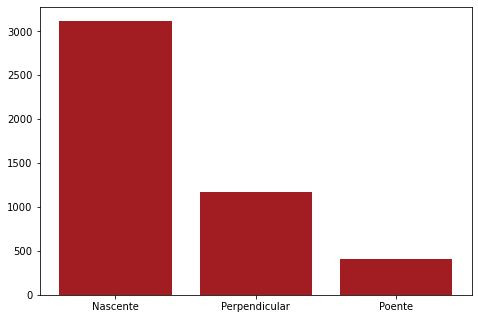

In [170]:
### Visualizações de dados

## Gráficos simples com matplotlib (graf de colunas)
fig = plt.figure()          #começando a figura
ax = fig.add_axes([0,0,1,1])#eixos
tabela = dados1.sol.value_counts() 
nomes = tabela.index        #nomes que vão pro eixo x
quantidade = tabela.values  #valores do eixo y
ax.bar(nomes,quantidade, color ='#a11d21')

plt.show()                  #visualizar o gráfico


In [171]:
### Gráfico arco íris interativo com plotly :D esse é brabo

# Boxplots dos preços de venda por cidade
dados_venda = dados1.loc[dados1.oferta=='Venda',:]
tabela = dados_venda.cidade.value_counts()
N = len(tabela)     # Número de caixas
nomes = tabela.index # Nome das cidades

# Tirando valores muito altos (recebem NA)
dados_venda.loc[dados_venda.preco>=2000000,'preco'] = np.nan

# Criando o range de cores do arco íris com css
cores = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)] 

# Cada caixa é representada por um dicionário que contém seus valores numéricos (y), seu nome (no caso a cidade) e sua cor
fig = go.Figure(data=[go.Box(
    y=dados_venda.loc[dados_venda.cidade==nomes[i],'preco'],
    name=nomes[i].title(),
    marker_color=cores[i]
    ) for i in range(int(N))])

# Arrumando o layout geral
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
    plot_bgcolor='rgb(233,233,233)',
)

fig.show() #Aí é só correr pro abraço né



In [ ]:
### Exportando csvs 

duas_coletas_dataframe.to_csv('duascoletas.csv') # o nome que você quer que o arquivo tenha

In [73]:
### Tempos computacionais (biblioteca timeit)

tic=timeit.default_timer()
round(((5*50)+100)/2.5,2)            # Aqui você colocaria as operações que quer saber quanto tempo levaram
toc=timeit.default_timer()

toc - tic  #retorna quanto tempo aquilo levou, em segundos

0.0001978999998755171